# Diferentes tipos de rendimiento

In [1]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

tickers = ['VOO', 'NAFTRAC.MX']
start_date = '2015-01-01'
end_date = '2024-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [2]:
# Obten rendimientos
rt = St.pct_change()

In [5]:
# Rendiiento aritmetico VOO
ra = St.VOO.iloc[-1]/St.VOO[0]-1
1000 * (1 + ra)

2735.030345463047

In [6]:
(1 + rt.VOO).prod()

2.7350303454630445

In [8]:
# Rendimiento geometrico
rg_diario = (1 + rt.VOO).prod()**(1/len(rt)) - 1

rg_anual = rg_diario * 252
rg_anual

0.11201601841417741

In [10]:
St.VOO.iloc[0] * (1+rg_diario) ** 2264

436.799987792861

$$PrecioInicial* (1 + r_g)^N = PrecioFinal$$

In [4]:
# Sacalo anual, interpretalo


In [5]:
# Comprobación


In [12]:
# Valores esperados acciones
ve_usa = rt.VOO.mean()
ve_mx = rt['NAFTRAC.MX'].mean()

# Volatilidad acciones 
s_usa = rt.VOO.std()
s_mx = rt['NAFTRAC.MX'].std()

# Correlacion
corr_usa_mx =  rt.corr()['NAFTRAC.MX']['VOO']

# Covarianza
cov_usa_mx =  rt.cov()['NAFTRAC.MX']['VOO']


$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b cov(a,b)$$


$$cov(a,b) = \sigma_a \sigma_b corr(a,b) $$

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b \sigma_a \sigma_b corr(a,b)$$


In [18]:
# Crea data frame con distintas correlaciones
def volatility_correlation(df, s_usa, s_mx, correlation):
    w1 = df['w_usa']
    w2 = df['w_mx']
    var_p = w1**2 * s_usa**2 + w2**2 * s_mx**2 + 2*w1*w2*correlation*s_usa*s_mx 
    vol_p = np.sqrt(var_p)
    return vol_p

w = np.linspace(0, 1, 100)
df = pd.DataFrame({
    'w_usa': w,
    'w_mx': 1 - w,
    'valor_esperado': (w*ve_usa  + (1-w) * ve_mx) * 252
})

# Obten la volatilidad real, correlacion -1, 1, 0


In [27]:
df['volatility'] = df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, corr_usa_mx), axis = 1) * np.sqrt(252)
df['volatility_0'] = df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 0), axis = 1) * np.sqrt(252)
df['volatility_-1'] = df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, -1), axis = 1) * np.sqrt(252)
df['volatility_1'] = df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 1), axis = 1) * np.sqrt(252)


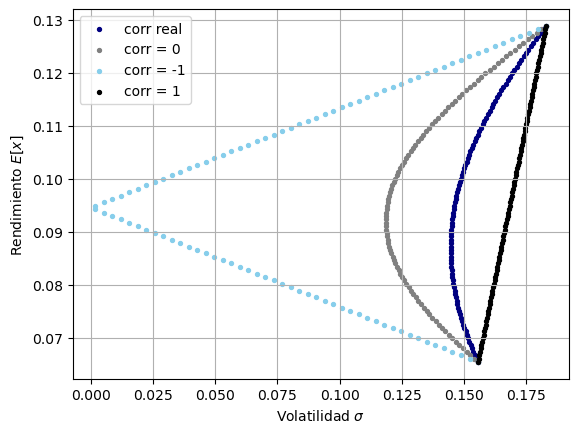

In [31]:
# Como se ve con la real?
plt.scatter(df.volatility, df.valor_esperado, marker = 'o', c = 'navy', s = 8, label = 'corr real')
plt.scatter(df.volatility_0, df.valor_esperado, marker = 'o', c = 'gray', s = 8, label = 'corr = 0')
plt.scatter(df['volatility_-1'], df.valor_esperado, marker = 'o', c = 'skyblue', s = 8, label = 'corr = -1')
plt.scatter(df.volatility_1, df.valor_esperado, marker = 'o', c = 'black', s = 8, label = 'corr = 1')

plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')
plt.legend()
plt.grid()
# Cra distintas correlaciones

## Varios activos

In [32]:
tickers = ['VOO', 'VEA', 'VWO', 'VNQ', 'NAFTRAC.MX']
start_date = '2015-01-01'
end_date = '2021-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change()

[*********************100%%**********************]  5 of 5 completed


$$Varianza = W * \Sigma * W^t $$
$$VE = W^T E[r]$$

In [35]:
# Crea una función que retorne el rendimiento esperado y la varianza de un portafolio
def random_portafolio(returns):
    def rand_weights(n):
        k = np.random.rand(n)
        return k / sum(k)
    # Definimos las constantes
    means = rt.mean()
    sigma = returns.cov()
    # Obtenemos pesos
    n_act = len(rt.keys())
    w = rand_weights(n_act)
    # Rendimiento esperado anual
    re = w.dot(means)
    # Varianza
    var = w.dot(sigma).dot(w)
    vol = np.sqrt(var)
    # Retorna rendimiento esperado, volatilidad y pesos
    return re * 252, vol * np.sqrt(252), w


random_portafolio(rt)

(0.07896983130103111,
 0.16097415717664904,
 array([0.35397972, 0.14192259, 0.0118863 , 0.18411656, 0.30809483]))

In [43]:
# Simula 500 portafolios 
valores_esperados = []
volatilidades = []
pesos = []
for i in range(10000):
    ve_i, vol_i, pesos_i = random_portafolio(rt)
    
    valores_esperados.append(ve_i)
    volatilidades.append(vol_i)
    pesos.append(pesos_i)
    
df = pd.DataFrame({
    'w': pesos,
    'rendimiento_esperado': valores_esperados,
    'volatilidad': volatilidades
})
df

,w,rendimiento_esperado,volatilidad
0,"[0.1771439418272319, 0.05152533303138825, 0.22...",0.089851,0.168313
1,"[0.07824457821776139, 0.19080075040565364, 0.1...",0.094750,0.174737
2,"[0.1447422663566969, 0.21729587320511173, 0.30...",0.077611,0.171138
3,"[0.44755619359003573, 0.04936694495250529, 0.1...",0.072949,0.152934
4,"[0.23353598010150736, 0.04556944724297596, 0.1...",0.089241,0.165359
...,...,...,...
9995,"[0.22584160348820068, 0.2467421943793924, 0.23...",0.084250,0.161474
9996,"[0.027569488935309267, 0.06772776965754593, 0....",0.085598,0.184868
9997,"[0.3191807125009641, 0.0971402397725999, 0.446...",0.067535,0.162836
9998,"[0.22668138343852012, 0.17442581335034385, 0.3...",0.078014,0.165156


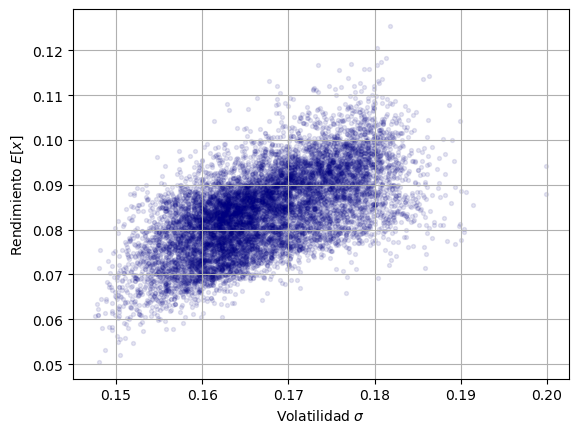

In [47]:
# Grafica
plt.scatter(df.volatilidad, df.rendimiento_esperado, c = 'navy', s = 8, alpha = 0.1)
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')
plt.grid()

# ¿en que invertir para obtener el de mínima varianza?

In [45]:
min_var = df[df.volatilidad == df.volatilidad.min()]
min_var['w'].values

array([array([0.5926885 , 0.14219228, 0.14610994, 0.10712964, 0.01187965])],
      dtype=object)

In [46]:
tickers

['VOO', 'VEA', 'VWO', 'VNQ', 'NAFTRAC.MX']

# Pesos

* S&P 500: 59.26%
* Países desarrollados: 14.21%
* Países no desarrollados: 14.61%
* Bienes raíces: 10.71%
* México: 1.18%


# Más riesgo, más volatilidad? Crea una regresión 

Porque lo riesgoso está barato.

In [48]:
df_regresion = pd.DataFrame({
    'valor_esperado': rt.mean() * 252,
    'volatilidad': rt.std() * np.sqrt(252)
})

In [58]:
from sklearn.linear_model import LinearRegression

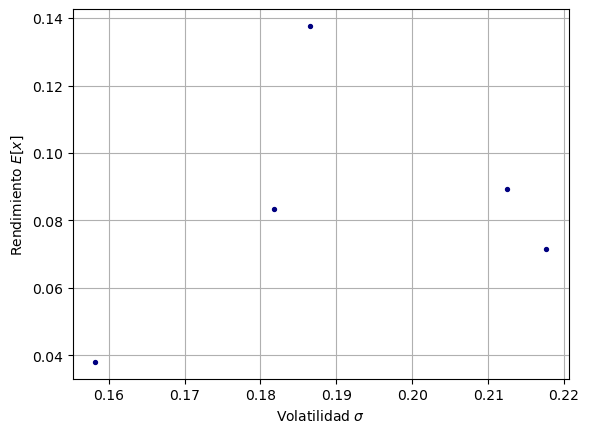

In [54]:
plt.scatter(df_regresion.volatilidad, df_regresion.valor_esperado, c = 'navy', s = 8)
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')

plt.grid()

In [60]:
model = LinearRegression()
X = df_regresion[['volatilidad']]
y = df_regresion[['valor_esperado']]

model.fit(X,y)

LinearRegression()

In [62]:
model.intercept_

array([-0.00192986])

In [63]:
model.coef_

array([[0.44874844]])

$$0.4487 * \sigma $$

In [64]:
df_regresion['predicciones'] = model.predict(X)

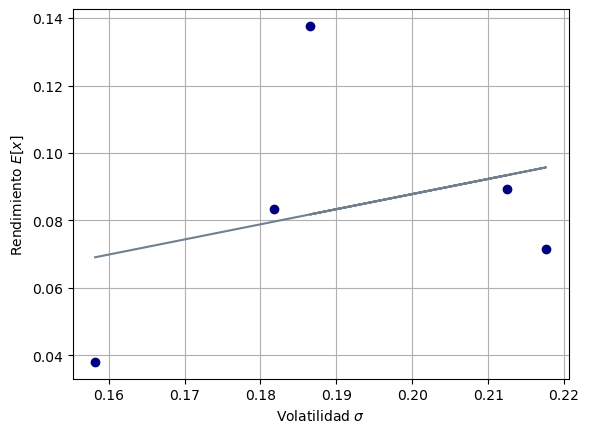

In [67]:
plt.scatter(df_regresion.volatilidad, df_regresion.valor_esperado, c = 'navy')
plt.plot(df_regresion.volatilidad, df_regresion.predicciones, c = 'slategray')

plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')

plt.grid()

## Calcular error del modelo

In [69]:
error_modelo = np.var(df_regresion['predicciones'] - df_regresion['valor_esperado'])
error_promedio = np.var(df_regresion['valor_esperado'].mean() - df_regresion['valor_esperado'])

In [70]:
(error_promedio - error_modelo)/error_promedio

0.09133175505735514

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_true = y, y_pred=df_regresion['predicciones'])

0.09133175505735558

El modelo es 9% mejor al modelo del promedio